# Cross Validation K-Fold exercise

Starting with the code below, reload the housing prices dataset that was used in the last exercise. Then apply K-Fold cross validation to it. An example can be found here: [cross_validation K-Fold](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cross_validation.KFold.html). What observations do you have?

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.cross_validation import KFold

# Load data from csv file
df = pd.read_csv('data/housing_prices.csv')
X = df[['square_feet', 'num_rooms']].values
y = df['price'].values

# Do K-Folds

# taking a look at the kfolds index
kf = KFold(n=len(X), n_folds=10, shuffle=False, random_state=10)
for train_idx, test_idx in kf:
    print(train_idx)
    print(test_idx)
    print('*' * 48)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[0 1 2 3 4]
************************************************
[ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[5 6 7 8 9]
************************************************
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[10 11 12 13 14]
************************************************
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[15 16 17 18 19]
************************************************
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[20 21 22 23 24]
************************************************
[ 0  1  2  3  4  5  6  7  8  9 10 1

In [51]:
from sklearn.metrics import r2_score

k_folds_avg = []
avg = 0
for k in range(2,11):
    print('kfolds={}'.format(k))
    kf = KFold(n=len(X), n_folds=k, shuffle=True, random_state=10)
    i, kfolds_total = 0, 0
    for train_idx, test_idx in kf:
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        lr = LinearRegression(normalize=True)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print('k-folds#={},R2={} '.format(i, r2))
        i +=1
        kfolds_total += r2
    avg = kfolds_total/k
    print('average r2={}'.format(avg))
    k_folds_avg.append(avg)
    print('*'*48)

kfolds=2
k-folds#=0,R2=0.49201826435994944 
k-folds#=1,R2=0.5987518507537568 
average r2=0.5453850575568531
************************************************
kfolds=3
k-folds#=0,R2=-0.4464436593890053 
k-folds#=1,R2=0.6114871640433459 
k-folds#=2,R2=0.5081669198082346 
average r2=0.2244034748208584
************************************************
kfolds=4
k-folds#=0,R2=0.13578663682161185 
k-folds#=1,R2=0.6822020581016979 
k-folds#=2,R2=0.7296797671832193 
k-folds#=3,R2=0.39815997816791526 
average r2=0.48645711006861103
************************************************
kfolds=5
k-folds#=0,R2=-0.06134441033774651 
k-folds#=1,R2=0.6482426549523469 
k-folds#=2,R2=0.5935517874001843 
k-folds#=3,R2=0.776833055874302 
k-folds#=4,R2=0.44434717242424315 
average r2=0.480326052062666
************************************************
kfolds=6
k-folds#=0,R2=-0.06665375134304097 
k-folds#=1,R2=-0.09329852434893726 
k-folds#=2,R2=0.7330645173741588 
k-folds#=3,R2=0.6811371305949627 
k-folds#=4,R2=0.6

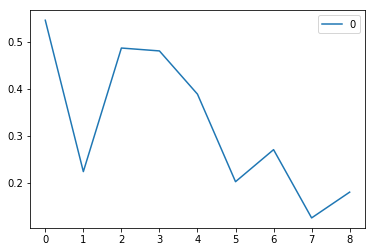

In [50]:
df = pd.DataFrame(k_folds_avg)
df.plot(kind='line')